# Hydrometrics and comparison S2S databases

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from scipy.optimize import*
from numpy import*

# Import badlands grid generation toolbox
import hydroGrid as hydr
# display plots in SVG format
%config InlineBackend.figure_format = 'svg' 

## Extracting metrics from simulations using the companion

In [30]:
folder='/live/share/Delta_2020/Delta_running/Synthetic/Delta_SL_f5Myr_A25m_Te50/h5/'

In [31]:
hydro = hydr.hydroGrid(folder=folder, \
        ptXY = [2e+6,1e+6])#Coordinates of the outlet of the main stream
hydro.getCatchment(timestep=120)#Pre-defined function to extract the catchment
hydro.extractMainstream()#Pre-defined function to extract the main stream of that catchment
hydro.computeParams(kd=0.0001, kc=5.e-6, m=0.5, n=1., num=500)#  Computes the cumulative main stream lenght
hydro.streamLght[-1]

3167037.206659569

In [32]:
#Length of longest river channel (m)
StreamL=round(hydro.streamLght[-1],1)
print (StreamL)

3167037.2


In [33]:
#Water discharge at the outlet (m3/s)
#Flow accumulation=FA
#Qw[m3/s]=rval[m/yr]*Area[m2]
rval=1
Qw=hydro.FA.max()*31557600.# multiplier to convert from second to year
print('area in m3', Qw) #m^3/yr)
area= (Qw/1e6)/1
print ('area in km2',area)

area in m3 2953451103643.897
area in km2 2953451.103643897


## Comparison with S2S datasets

In [34]:
Nyberg_Qs1MT_yr=pd.read_table('./Nyberg_Qs>1MT_yr.csv',  header=0, sep=",")
df = pd.DataFrame(Nyberg_Qs1MT_yr, columns = Nyberg_Qs1MT_yr.columns)#Still don't understand why I have to convert Nyberg into dataframe but it works 


In [37]:
Somme=pd.read_table('./Somme_etal_2009.csv', header=0, sep=",")
#print (Somme.columns)

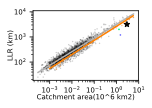

In [67]:
#figsize=(1.57,1.18)# This size is in inches
plt.figure(figsize=(5*.39,3.5*.39))
plt.rc("font", size=7)

m, c=np.polyfit(log(df.Area/1e6), log(df.River_L/1e3), 1) # getting the intercept and the slope
y_fit = np.exp(m*log(df.Area/1e6) + c) # calculate the fitted values of y 
plt.loglog(df.Area/1e6,df.River_L/1e3,'bo', markersize=.5, c=(0,0,0,.2), label='Nyberg et al., 2018')
plt.plot(df.Area/1e6, y_fit, c=(.7, .7, .7), label='y=76196 x^0.55')
# #Somme
x=Somme['Catchment area\n(× 106 km2)']
y=Somme['Length of longest\nriver channel (km)']
x.nna=x[~np.isnan(x)]#;print x.nna
y.nna=y[~np.isnan(y)]#; print y.nna
x=np.array(x.nna)
y=np.array(y.nna)
mS, cS=np.polyfit(log(x), log(y), 1) # getting the intercept and the slope
y_fit_S= np.exp(mS*log(x) + cS) # calculate the fitted values of y 

#Plot
plt.loglog(x,y,'o', c=(1,0.5,0,.5), markersize=.5, label='S2S Somme et al 2009')
plt.plot(x, y_fit_S, c=(1,0.5,0,1), label='y=2655.3x^0.56')
plt.plot(1.3, 2000, 'o', c=(0, 1, 0.5), markersize=.8, label='Early Paleocene Paleo-Miss')
plt.plot(1.5, 1200, 'o', c=(0, 0, 1,.5), markersize=.8, label='Oligocene paleo-Miss')
plt.loglog(area/1e6, StreamL/1e3,'*', c=(0, 0, 0), label='Delta_150119_rval1m_SL_Oli')

plt.xlabel('Catchment area(10^6 km2)', labelpad=0.001)
plt.ylabel('LLR (km)', labelpad=0.001)
#plt.legend(loc=0)
plt.tight_layout(pad=.0)
plt.tick_params(axis='both', which='major', labelsize=7)
#plt.set_xlabel('eU (ppm)', fontdict={'fontsize': 7}, labelpad=0.1)
plt.savefig("./S2S.pdf")
